In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the meta genomics (mgx) and metatranscriptomics (mtx) files

In [3]:
mtx_path = pd.read_table('MTX-2017-12-14/pathabundance_relab.tsv')
mgx_path = pd.read_table('MGX-2017-12-14/pathabundance_relab.tsv')

In [4]:
mtx_path.head()

,# Pathway,CSM5FZ4M,CSM5MCUO,CSM5MCVN,CSM5MCW6,CSM5MCWC,CSM5MCWE,CSM5MCWQ,CSM5MCX3,CSM5MCXD,...,MSMB4LZ4,PSM6XBRK_TR,PSM6XBSM,PSM6XBUQ,PSM6XBV4,PSM7J12D,PSM7J171,PSMA265J_TR,PSMA265J,PSMA266U
0,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.015748,0.007513,0.025239,0.017006,0.002012,0.002018,0.015234,0.010873,0.023642,...,0.007144,0.01399,0.005663,0.007099,0.014726,0.013905,0.006449,0.0,0.000855,0.004999
1,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000057,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [5]:
mgx_path.head()

,# Pathway,CSM5FZ4M,CSM5MCUO,CSM5MCVL,CSM5MCVN,CSM5MCW6,CSM5MCWC,CSM5MCWE,CSM5MCWG,CSM5MCWQ,...,CSM5MCVJ_P,CSM5MCWI_P,MSM5LLHA_P,HSM5MD59_P,HSM5MD8N_P,CSM6J2H9_P,HSM5MD4A_P,CSM5MCUW_P,ESM5MEBA_P,HSM5FZC2_P
0,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.01581,0.010170,0.016743,0.018002,0.015312,0.004618,0.004357,0.003774,0.011898,...,0.019465,0.022263,0.008464,0.009967,0.013779,0.011970,0.006240,0.010508,0.013684,0.016919
1,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000026,0.000000,0.000000,0.001087,0.000000,0.000386,0.000000,0.000000,0.000000
2,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.00000,0.000157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000496,0.000070,0.000210,0.000469,0.000113,0.000000,0.000000,0.000000,0.000000
4,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000104,0.000000,0.000145,0.000000,0.000000


In [6]:
## remove mgx columns that don't match mtx columns
commoncols = list(np.intersect1d(mgx_path.columns, mtx_path.columns))
mgx_path_sub = mgx_path[commoncols]
mtx_path_sub = mtx_path[commoncols]

Convert to long format, and separate the pathway column into path identifier, path name, and species name

In [7]:
#find string between two specified strings
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""
    
def get_spp(ix):
    mysplit = ix.split("|")
    if len(mysplit)>1:
        return(mysplit[1])
    else:
        return("")

In [8]:
mtx_path_sub_long = pd.melt(mtx_path_sub, id_vars="# Pathway")
mtx_path_sub_long.columns = ["Pathway", "Sample", "RNA.Abundance"]

mtx_path_sub_long["PATHID"]=[find_between(i, "", ":") for i in mtx_path_sub_long["Pathway"]]
mtx_path_sub_long["PATHNAME"]=[find_between(i, ":", "|") for i in mtx_path_sub_long["Pathway"]]
mtx_path_sub_long["SPECIES"]=[get_spp(i) for i in mtx_path_sub_long["Pathway"]]

mtx_path_sub_long.head()

,Pathway,Sample,RNA.Abundance,PATHID,PATHNAME,SPECIES
0,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.015748,1CMET2-PWY,,
1,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Akkermansia.s__Akkermansia_muciniphila
2,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_barnesiae
3,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_caccae
4,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_cellulosilyticus


In [9]:
mgx_path_sub_long = pd.melt(mgx_path_sub, id_vars="# Pathway")
mgx_path_sub_long.columns = ["Pathway", "Sample", "DNA.Abundance"]

mgx_path_sub_long["PATHID"]=[find_between(i, "", ":") for i in mgx_path_sub_long["Pathway"]]
mgx_path_sub_long["PATHNAME"]=[find_between(i, ":", "|") for i in mgx_path_sub_long["Pathway"]]
mgx_path_sub_long["SPECIES"]=[get_spp(i) for i in mgx_path_sub_long["Pathway"]]

mgx_path_sub_long.head()

,Pathway,Sample,DNA.Abundance,PATHID,PATHNAME,SPECIES
0,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.01581,1CMET2-PWY,,
1,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.00000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Akkermansia.s__Akkermansia_muciniphila
2,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.00000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_barnesiae
3,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.00000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_caccae
4,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.00000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_cellulosilyticus


merge the DNA and RNA abundance tables

In [10]:
mtx_mgx = mtx_path_sub_long.merge(mgx_path_sub_long,  how="left",  
                                 on=["Pathway", "Sample", "PATHID", "PATHNAME", "SPECIES"])

In [11]:
mtx_mgx.head()

,Pathway,Sample,RNA.Abundance,PATHID,PATHNAME,SPECIES,DNA.Abundance
0,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.015748,1CMET2-PWY,,,0.01581
1,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Akkermansia.s__Akkermansia_muciniphila,0.00000
2,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_barnesiae,0.00000
3,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_caccae,0.00000
4,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.000000,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,g__Bacteroides.s__Bacteroides_cellulosilyticus,0.00000


Plot RNA vs DNA abundance for only a single patient (```CSM5FZ4M```), and only rows that have a species annotation

(0, 0.006)

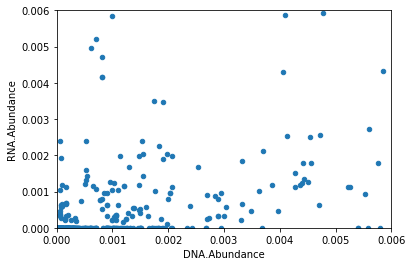

In [12]:
ax = mtx_mgx.loc[(mtx_mgx.Sample=="CSM5FZ4M") & (mtx_mgx.SPECIES!=""),:].plot.scatter(x="DNA.Abundance", y="RNA.Abundance")
ax.set_xlim(0,0.006)
ax.set_ylim(0,0.006)

Plot RNA vs DNA abundance for all patients, and rows that DON'T have a species annotation

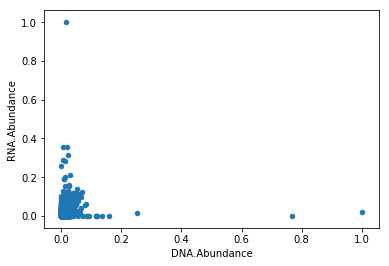

In [13]:
ax = mtx_mgx.loc[mtx_mgx.SPECIES=="",:].plot.scatter(x="DNA.Abundance", y="RNA.Abundance")


[None, (1e-08, 1), None, (1e-08, 1)]

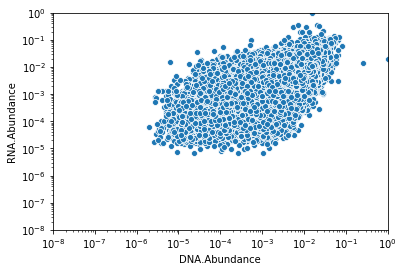

In [18]:
myplot = sns.scatterplot(data = mtx_mgx.loc[mtx_mgx.SPECIES=="",:], x="DNA.Abundance", y="RNA.Abundance")
myplot.set(xscale="log", yscale="log", xlim=[0.00000001,1], ylim=[0.00000001,1])

[None, (1e-06, 1), None, (1e-06, 1)]

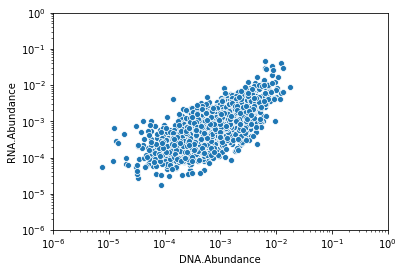

In [25]:
myplot = sns.scatterplot(data = mtx_mgx.loc[(mtx_mgx.SPECIES!="") & (mtx_mgx.PATHID=="1CMET2-PWY"),:], x="DNA.Abundance", y="RNA.Abundance")
myplot.set(xscale="log", yscale="log", xlim=[0.000001,1], ylim=[0.000001,1])

In [24]:
pathnames = mtx_mgx[["PATHNAME", "PATHID"]].drop_duplicates(inplace=False)
pathnames.loc[pathnames.PATHNAME!=""].to_csv("PATHNAMES.csv")

[None, (1e-06, 1), None, (1e-06, 1)]

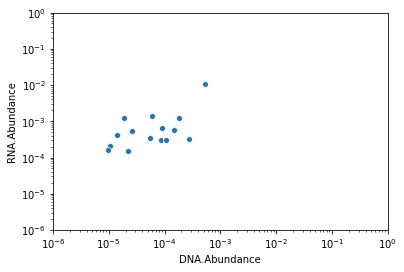

In [29]:
myplot = sns.scatterplot(data = mtx_mgx.loc[(mtx_mgx.SPECIES!="") & (mtx_mgx.PATHID=="METHANOGENESIS-PWY"),:], x="DNA.Abundance", y="RNA.Abundance")
myplot.set(xscale="log", yscale="log", xlim=[0.000001,1], ylim=[0.000001,1])

In [27]:
mtx_mgx.loc[(mtx_mgx.SPECIES!="") & (mtx_mgx.PATHID=="METHANOGENESIS-PWY"),:]

,Pathway,Sample,RNA.Abundance,PATHID,PATHNAME,SPECIES,DNA.Abundance
872,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5FZ4M,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
6933,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCUO,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
12994,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCVN,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
19055,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCW6,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
25116,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCWC,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
31177,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCWE,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
37238,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCWQ,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
43299,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCX3,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
49360,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCXD,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0
55421,METHANOGENESIS-PWY: methanogenesis from H2 and...,CSM5MCXH,0.0,METHANOGENESIS-PWY,methanogenesis from H2 and CO2,g__Methanobrevibacter.s__Methanobrevibacter_sm...,0.0


Is the row without a species annotation simply the sum of all species (within that pathway)?

In [14]:
mtx_mgx_TEST_spp = mtx_mgx.loc[(mtx_mgx.Sample=="CSM5FZ4M") & (mtx_mgx.SPECIES!=""),:]
mtx_mgx_TEST_nospp = mtx_mgx.loc[(mtx_mgx.Sample=="CSM5FZ4M") & (mtx_mgx.SPECIES==""),:]

In [15]:
mtx_mgx_TEST_spp.groupby("PATHID").agg('sum')

,RNA.Abundance,DNA.Abundance
PATHID,,
1CMET2-PWY,0.004304,0.006902
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,0.000000,0.000000
7ALPHADEHYDROX-PWY,0.000000,0.000000
AEROBACTINSYN-PWY,0.000000,0.000000
ALLANTOINDEG-PWY,0.000000,0.000000
ANAEROFRUCAT-PWY,0.000000,0.000000
ANAGLYCOLYSIS-PWY,0.000325,0.003122
ARG+POLYAMINE-SYN,0.000000,0.000000
ARGDEG-PWY,0.000000,0.000000


In [16]:
mtx_mgx_TEST_nospp

,Pathway,Sample,RNA.Abundance,PATHID,PATHNAME,SPECIES,DNA.Abundance
0,1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...,CSM5FZ4M,0.015748,1CMET2-PWY,,,0.015810
28,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY: 4-hydr...,CSM5FZ4M,0.000000,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,,,0.000000
30,7ALPHADEHYDROX-PWY: cholate degradation (bacte...,CSM5FZ4M,0.000000,7ALPHADEHYDROX-PWY,,,0.000000
34,AEROBACTINSYN-PWY: aerobactin biosynthesis,CSM5FZ4M,0.000000,AEROBACTINSYN-PWY,,,0.000000
36,ALL-CHORISMATE-PWY: superpathway of chorismate...,CSM5FZ4M,0.000000,ALL-CHORISMATE-PWY,,,0.000000
37,ALLANTOINDEG-PWY: superpathway of allantoin de...,CSM5FZ4M,0.000000,ALLANTOINDEG-PWY,,,0.000000
40,ANAEROFRUCAT-PWY: homolactic fermentation,CSM5FZ4M,0.009075,ANAEROFRUCAT-PWY,,,0.009463
43,ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),CSM5FZ4M,0.036794,ANAGLYCOLYSIS-PWY,,,0.014865
63,ARG+POLYAMINE-SYN: superpathway of arginine an...,CSM5FZ4M,0.000000,ARG+POLYAMINE-SYN,,,0.000030
65,"ARGDEG-PWY: superpathway of L-arginine, putres...",CSM5FZ4M,0.000000,ARGDEG-PWY,,,0.000000


Same pathway appears to have different abundance values for the sum of found species vs rows without species, so no, the rows without species annotations are NOT simply an aggregate of the species

## Persisters
Here we define persisters as species that have low amounts of RNA compared to DNA, genome-wide.    
Remove rows without species     
Compute the DNA/RNA ratio (0's will cause trouble. Remove rows that are 0 for RNA)    
Group by species/sample

In [33]:
mtx_mgx_PERSIST_spp = mtx_mgx.loc[(mtx_mgx["SPECIES"]!="") & (mtx_mgx["RNA.Abundance"]>0),:]
mtx_mgx_PERSIST_spp["DNA/RNA"] = mtx_mgx_PERSIST_spp["DNA.Abundance"]/mtx_mgx_PERSIST_spp["RNA.Abundance"]
mtx_mgx_PERSIST_spp.groupby(by=["SPECIES", "Sample"]).agg(["mean", "var"])

D:\defne\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RNA.Abundance  \
                                                                      mean   
SPECIES                                          Sample                      
g__Acidaminococcus.s__Acidaminococcus_fermentans MSM6J2RC         0.000074   
g__Acidaminococcus.s__Acidaminococcus_intestini  CSM79HH4         0.000068   
                                                 CSM79HH8         0.000537   
                                                 CSM79HPA         0.000838   
                                                 CSM79HPC         0.000576   
                                                 CSM7KOKR         0.000133   
                                                 CSM7KOLE         0.000086   
                                                 CSM7KONK         0.000062   
                                                 CSM7KOTC         0.001181   
                                                 CSM7KOTK         0.000299   
                                                 CSM7KOTQ         0.000208   
                                                 CSM7KOTS         0.000303   
                                                 CSM7KOTU         0.000194   
                                                 CSM9X1YV         0.000557   
                                                 CSM9X21T         0.000256   
                                                 CSM9X235         0.000602   
                                                 CSM9X237         0.000852   
                                                 CSM9X23B         0.000112   
                                                 HSM67VFJ         0.000059   
                                                 HSM6XRQM         0.000447   
                                                 HSM7CYY7         0.000263   
                                                 HSM7CYYD         0.000124   
                                                 MSM6J2HP         0.000157   
                                                 MSM6J2HR         0.000109   
                                                 MSM6J2QF         0.000038   
                                                 MSM6J2QH         0.000025   
                                                 MSM79H5Q         0.000181   
                                                 MSM79H5Y         0.000137   
                                                 MSM79HAH         0.000192   
                                                 PSM6XBVI         0.000582   
...                                                                    ...   
unclassified                                     PSMA263W         0.003423   
                                                 PSMA264S         0.000759   
                                                 PSMA264U         0.000840   
                                                 PSMA265B         0.000438   
                                                 PSMA265F         0.001140   
                                                 PSMA265H         0.003156   
                                                 PSMA265J         0.003047   
                                                 PSMA265J_TR      0.011186   
                                                 PSMA265N         0.001586   
                                                 PSMA265T         0.001360   
                                                 PSMA265X         0.001797   
                                                 PSMA2668         0.000444   
                                                 PSMA266I         0.002547   
                                                 PSMA266M         0.001619   
                                                 PSMA266Q         0.001745   
                                                 PSMA266U         0.000946   
                                                 PSMA266Y         0.005551   
                                                 PSMA2675         0.001665   
     

In [35]:
maxlev = max(mtx_mgx_PERSIST_spp["DNA/RNA"])
mtx_mgx_PERSIST_spp.loc[mtx_mgx_PERSIST_spp["DNA/RNA"]==maxlev,:]

,Pathway,Sample,RNA.Abundance,PATHID,PATHNAME,SPECIES,DNA.Abundance,DNA/RNA
1874872,PWY-5367: petroselinate biosynthesis|g__Eubact...,HSM7J4HS,0.000016,PWY-5367,petroselinate biosynthesis,g__Eubacterium.s__Eubacterium_rectale,0.004767,294.064482


Plot the DNA/RNA ratio of organisms with higher than an arbitrary threshold value (50) 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

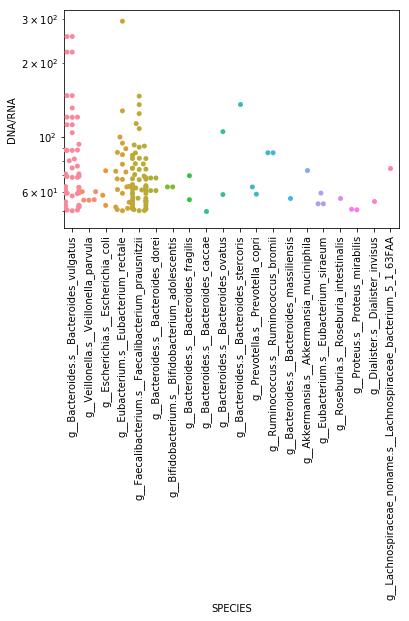

In [44]:
myplot = sns.swarmplot(data=mtx_mgx_PERSIST_spp.loc[mtx_mgx_PERSIST_spp["DNA/RNA"]>50,:],
                x="SPECIES",
                y="DNA/RNA").set(yscale="log")

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)